,age,height,gender
0,25.763080,184.873752,мужчина
1,35.091538,182.528452,мужчина
2,35.044976,184.957293,мужчина
3,30.089828,170.863437,мужчина
4,31.461328,177.858821,мужчина
...,...,...,...
1995,30.260779,171.428729,женщина
1996,27.015686,179.477797,женщина
1997,28.378032,153.743751,женщина
1998,31.152148,162.124423,женщина


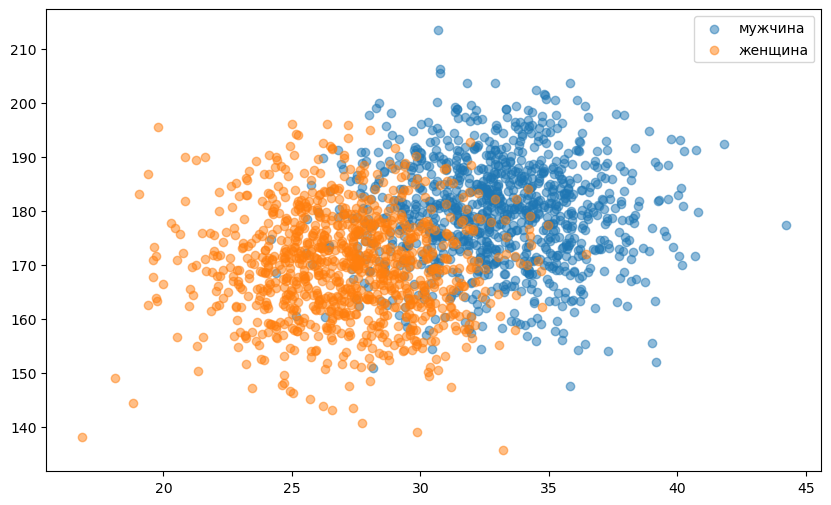

In [9]:
import random #импорт модуля рандом
import pandas as pd #импорт библиотеки Pandas

class ClusterGenerator: #создание класса
    def column(self, name, center, spread): #создание функции 
        return {'name': name, 'center': center, 'spread': spread} #возврат данных в словарь
    def generate(self, n_rows, columns): #создание функции-генератора
        data = {} #создание словаря в который вернутся полученные занчения генератора
        for column in columns: #созданеи цикла
            data[column['name']] = [random.gauss(column['center'], column['spread']) for _ in range(n_rows)]
            #создание последовательности с помощью генерации чисел по распределению Гауса
        return pd.DataFrame(data) #возрат данных в табличной форме
    

    
cg = ClusterGenerator()
# вывод таблицы
male_df = cg.generate(1000, [
    cg.column ('age', center = 33, spread = 3),
    cg.column ('height', center = 180, spread = 10)
    ])

male_df['gender'] = 'мужчина'

female_df = cg.generate(1000, [
    cg.column ('age', center = 27, spread = 3),
    cg.column ('height', center = 170, spread = 10)
    ])
female_df ['gender'] = 'женщина'
df = pd.concat([male_df, female_df]).reset_index(drop = True)
display (df)

#вывод графика
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
for gender in df.gender.unique():
    plt.scatter(
    df[df.gender == gender]['age'],
    df[df.gender == gender]['height'],
    alpha = 0.5,
    label = gender
    )
plt.legend()
plt.show()
